### Libraries

In [1]:
# Importing libraries
import pandas as pd
from IPython.display import Image
from google.oauth2 import service_account

### Data extraction

In [2]:
# Extracting contracts table
contracts = pd.read_csv('../data/contracts_table.csv')
contracts

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,fk_empresa_contratada
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,1
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,2
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,3
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,4
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,5
...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,208,243,65
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,209,244,17
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,212,246,66
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,213,247,67


In [3]:
# Extracting dates table
dates = pd.read_csv('../data/dates_table.csv')
dates

,id_data,data
0,1,20/05/2014
1,2,27/09/2014
2,3,28/11/2014
3,4,20/12/2014
4,5,28/12/2014
...,...,...
249,250,24/10/2019
250,251,24/10/2020
251,252,05/11/2020
252,253,23/01/2020


In [4]:
# Extracting companies table
companies = pd.read_csv('../data/companies_table.csv')
companies

,id_empresa,nome_empresa
0,1,Thomas Jefferson
1,2,Chaveiro City
2,3,HBL Carimbos
3,4,Claro S/A
4,5,Imprensa Nacional
...,...,...
63,64,Nara Comercial
64,65,SESI-DF
65,66,FORMA
66,67,IG Elevadores


### Data transformation

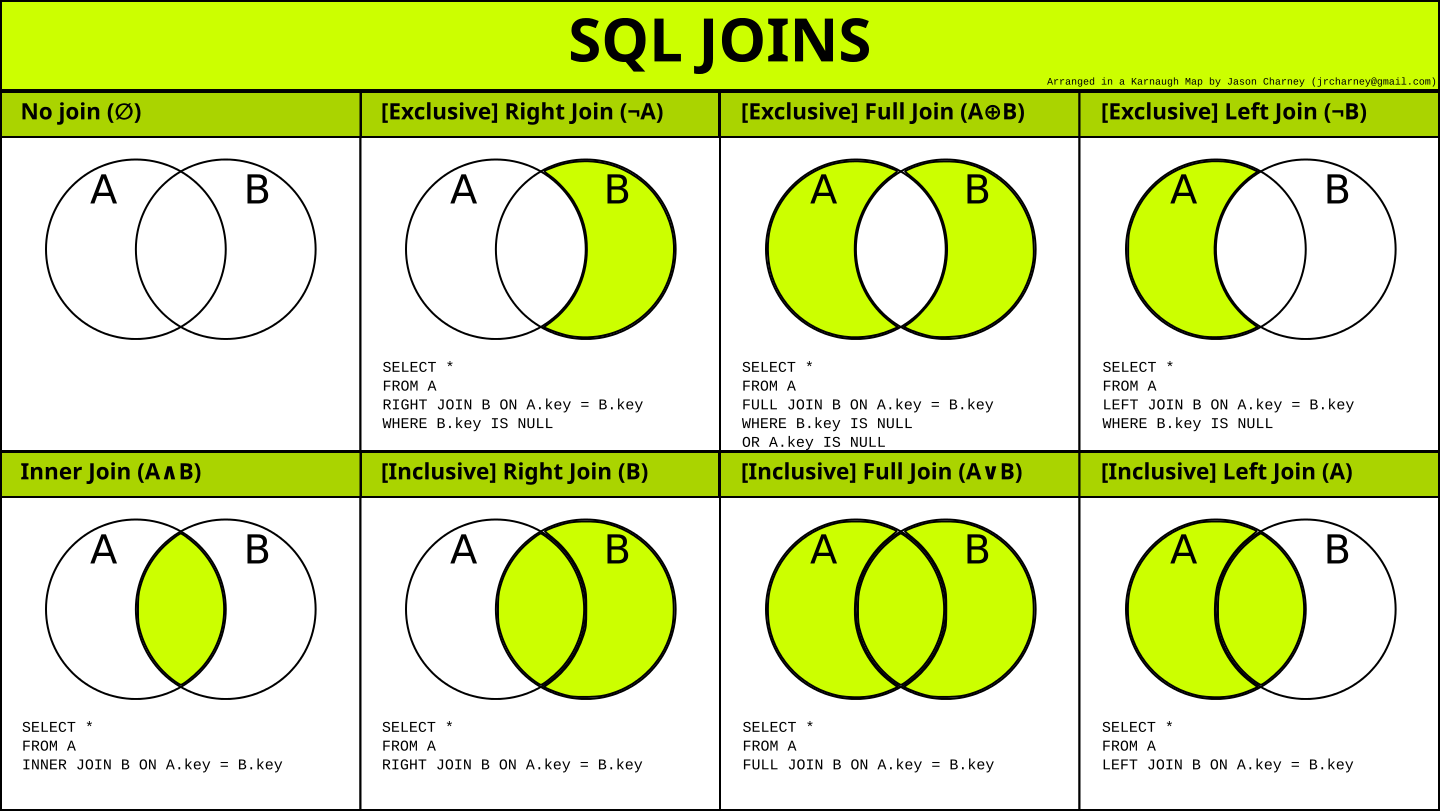

In [5]:
Image('https://ajuda.gitlab.io/guia-rapido/sql/_sql/join.png')

In [6]:
# Left table = contracts
# Right table = companies
# Left key = left on
# Right key = right on
# Inclusive left join = left
contracts_mod = contracts.merge(companies, 
                                left_on='fk_empresa_contratada', 
                                right_on='id_empresa', 
                                how='left')
contracts_mod

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,fk_empresa_contratada,id_empresa,nome_empresa
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,1,1,Thomas Jefferson
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,2,2,Chaveiro City
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,3,3,HBL Carimbos
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,4,4,Claro S/A
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,5,5,Imprensa Nacional
...,...,...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,208,243,65,65,SESI-DF
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,209,244,17,17,Central IT
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,212,246,66,66,FORMA
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,213,247,67,67,IG Elevadores


In [7]:
# Dropping useless columns
# Showing first 5 rows
contracts_mod.drop(columns=['id_empresa', 'fk_empresa_contratada'], inplace=True)
contracts_mod.head(5)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,nome_empresa
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,Thomas Jefferson
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,Chaveiro City
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,HBL Carimbos
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,Claro S/A
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,Imprensa Nacional


In [8]:
# Left table = contracts
# Right table = dates
# Left key = left on
# Right key = right on
# Inclusive left join = left
final_contracts = contracts_mod.merge(dates, 
                                left_on='inicio_vigencia', 
                                right_on='id_data', 
                                how='left')
# Dropping useless columns
# Renaming columns
# Showing first 5 rows
final_contracts.drop(columns=['inicio_vigencia', 'id_data'], inplace=True)
final_contracts.rename(columns={'data': 'data_inicio_vigencia'}, inplace=True)
final_contracts.head(5)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,termino_vigencia,nome_empresa,data_inicio_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,32,Thomas Jefferson,20/12/2014
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,33,Chaveiro City,26/02/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,33,HBL Carimbos,10/02/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,33,Claro S/A,01/01/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,35,Imprensa Nacional,27/01/2015


In [9]:
# Left table = contracts
# Right table = dates
# Left key = left on
# Right key = right on
# Inclusive left join = left
final_contracts = final_contracts.merge(dates, 
                                left_on='termino_vigencia', 
                                right_on='id_data', 
                                how='left')
# Dropping useless columns
# Renaming columns
# Showing first 5 rows
final_contracts.drop(columns=['termino_vigencia', 'id_data'], inplace=True)
final_contracts.rename(columns={'data': 'data_termino_vigencia'}, inplace=True)
final_contracts.head(5)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,20/12/2014,19/12/2015
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,26/02/2015,31/12/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,10/02/2015,31/12/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,01/01/2015,31/12/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,27/01/2015,26/01/2016


In [10]:
# Showing null cells (0)
final_contracts.count()

id_contrato              184
nome_contrato            184
objeto_contrato          184
valor_contrato           184
nome_empresa             184
data_inicio_vigencia     184
data_termino_vigencia    184
dtype: int64

In [11]:
# Showing data types
final_contracts.dtypes

id_contrato                int64
nome_contrato             object
objeto_contrato           object
valor_contrato           float64
nome_empresa              object
data_inicio_vigencia      object
data_termino_vigencia     object
dtype: object

In [12]:
# Fixing wrong date "31/09"
final_contracts.data_termino_vigencia = final_contracts.data_termino_vigencia.str.replace('31/09/2017', '30/09/2017')

In [13]:
# Transforming string date into date type
final_contracts.data_inicio_vigencia = pd.to_datetime(final_contracts.data_inicio_vigencia,
                                                     format='%d/%m/%Y').dt.date

In [14]:
# Transforming string date into date type
final_contracts.data_termino_vigencia = pd.to_datetime(final_contracts.data_termino_vigencia,
                                                     format='%d/%m/%Y').dt.date

In [15]:
# Showing first 5 rows
final_contracts.head(5)

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,2014-12-20,2015-12-19
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,2015-02-26,2015-12-31
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,2015-02-10,2015-12-31
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,2015-01-01,2015-12-31
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,2015-01-27,2016-01-26


In [16]:
# Fixing data types after debug
final_contracts['data_termino_vigencia'] = (
    final_contracts['data_termino_vigencia']
        .astype(str)
        .str.strip()
)

final_contracts['data_termino_vigencia'] = pd.to_datetime(
    final_contracts['data_termino_vigencia'],
    errors='coerce'
)

final_contracts['data_inicio_vigencia'] = (
    final_contracts['data_inicio_vigencia']
        .astype(str)
        .str.strip()
)

final_contracts['data_inicio_vigencia'] = pd.to_datetime(
    final_contracts['data_inicio_vigencia'],
    errors='coerce'
)

In [17]:
# Creating column "tempo_contrato"
final_contracts['tempo_contrato'] = (final_contracts.data_termino_vigencia - final_contracts.data_inicio_vigencia).dt.days
final_contracts

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia,tempo_contrato
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,2014-12-20,2015-12-19,364
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,2015-02-26,2015-12-31,308
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,2015-02-10,2015-12-31,324
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,2015-01-01,2015-12-31,364
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,2015-01-27,2016-01-26,364
...,...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,SESI-DF,2020-07-24,2021-07-24,365
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,Central IT,2020-07-27,2021-07-27,365
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,FORMA,2020-08-19,2021-08-19,365
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,IG Elevadores,2020-08-31,2021-08-31,365


In [18]:
# Searching duplicates in nome_contrato
final_contracts.nome_contrato.value_counts()

nome_contrato
42064       5
005/2015    5
006/2015    5
004/16      5
001/2015    4
           ..
11/2020     1
13/2020     1
16/2020     1
18/2020     1
20/2020     1
Name: count, Length: 122, dtype: int64

In [19]:
# Searching possible wrong datas
final_contracts[final_contracts.nome_contrato == '004/16']

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia,tempo_contrato
49,50,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2016-05-01,2017-05-01,365
71,72,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2017-05-01,2018-05-01,365
99,100,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2019-05-01,2019-05-01,0
123,124,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2019-05-01,2020-05-01,366
167,168,004/16,Serviços de Telefonia Móvel (Celulares),62780.6,Claro S/A,2020-05-01,2021-05-01,365


In [20]:
# Searching possible wrong datas
final_contracts.tempo_contrato.value_counts()

tempo_contrato
 365     88
 366     45
 364     10
 1096     8
 729      2
 730      2
 750      2
 1095     2
 352      2
 749      2
 722      2
 731      2
 0        2
 359      2
 308      1
 340      1
 324      1
 339      1
 394      1
 363      1
 353      1
-2        1
 350      1
 182      1
 179      1
 531      1
 295      1
Name: count, dtype: int64

In [21]:
# Cleaning wrong data
final_contracts = final_contracts[final_contracts.tempo_contrato > 0]

In [22]:
# Fixing indexes
final_contracts.reset_index(drop=True, inplace=True)

In [23]:
# Validating new indexes
final_contracts.tail()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,data_inicio_vigencia,data_termino_vigencia,tempo_contrato
176,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,SESI-DF,2020-07-24,2021-07-24,365
177,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,Central IT,2020-07-27,2021-07-27,365
178,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,FORMA,2020-08-19,2021-08-19,365
179,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,IG Elevadores,2020-08-31,2021-08-31,365
180,184,20/2020,Contratação de Serviço comum de engenharia,102600.00,Serôa Construtora,2020-09-08,2021-09-08,365


### Data loading

In [24]:
# Creating credentials to authenticate in GCP
credentials = service_account.Credentials.from_service_account_file(filename='../gcp-key/GBQ.json', 
                                                                    scopes=["https://www.googleapis.com/auth/cloud-platform"])

In [25]:
# Using credentials to send final_contracts table to BigQuery dataset
final_contracts.to_gbq(credentials=credentials, 
                                 destination_table='etlcourse.etl_course.csv_etl_course', 
                                 if_exists='replace', 
                                 table_schema=[{'name': 'data_inicio_vigencia', 'type': 'DATE'},
                                               {'name': 'data_termino_vigencia', 'type': 'DATE'}])

C:\Users\mathe\AppData\Local\Temp\ipykernel_4100\1078303058.py:2: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  final_contracts.to_gbq(credentials=credentials,
